In [43]:
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import seaborn as sns #for the plot
import matplotlib.pyplot as plt # for data visualization

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LinearRegression #for linear regression 
from sklearn.ensemble import RandomForestRegressor # for building the RFR model


In [44]:
df = pd.read_json('C:/Users/bianc/OneDrive/Dokumenter/Exchange/ADA/Project/data_all_plus_good.json') #read the file (json)
df.columns  # print collums

Index(['country', 'stem grad', 'ai_enter', 'population', 'no grad pr 1000',
       'internet use', 'internet access', 'NOP never used internet',
       'E-Government', 'good digital skills'],
      dtype='object')

In [45]:
#Data exploration

df.head() # Print first 5 points

,country,stem grad,ai_enter,population,no grad pr 1000,internet use,internet access,NOP never used internet,E-Government,good digital skills
0,Belgium,31466,10.3,11554767,2.723205,92.79,35.41,4.55,58.55,54.23
1,Bulgaria,14726,3.3,6916548,2.129097,75.27,11.35,17.02,19.13,31.18
2,Czechia,30514,4.5,10494836,2.907525,88.85,31.47,7.25,57.94,59.69
3,Denmark,11885,23.9,5840045,2.035087,98.89,42.88,0.69,90.60,68.65
4,Germany,123266,10.6,83155031,1.482364,91.43,33.13,6.19,46.30,48.92


In [46]:
df.describe() # print describtive statistics for each feature

,stem grad,ai_enter,population,no grad pr 1000,internet use,internet access,NOP never used internet,E-Government,good digital skills
count,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,38438.593750,7.490625,1.707276e+07,2.172747,88.780937,26.590937,8.465000,53.304688,54.411250
std,56021.669594,5.276140,2.413082e+07,1.177077,6.691366,13.357718,5.506943,19.967138,14.197179
min,368.000000,0.900000,5.161000e+05,0.261508,75.270000,4.670000,0.070000,10.810000,23.800000
25%,5059.500000,3.225000,2.821226e+06,1.431079,82.287500,15.347500,4.775000,42.317500,48.432500
50%,13555.000000,6.450000,6.894048e+06,2.213636,88.965000,26.525000,7.785000,55.815000,54.705000
75%,34952.750000,10.375000,1.303493e+07,2.809465,93.067500,35.125000,11.417500,67.472500,63.475000
max,222509.000000,23.900000,8.361436e+07,5.890354,99.420000,53.190000,19.860000,90.600000,79.180000


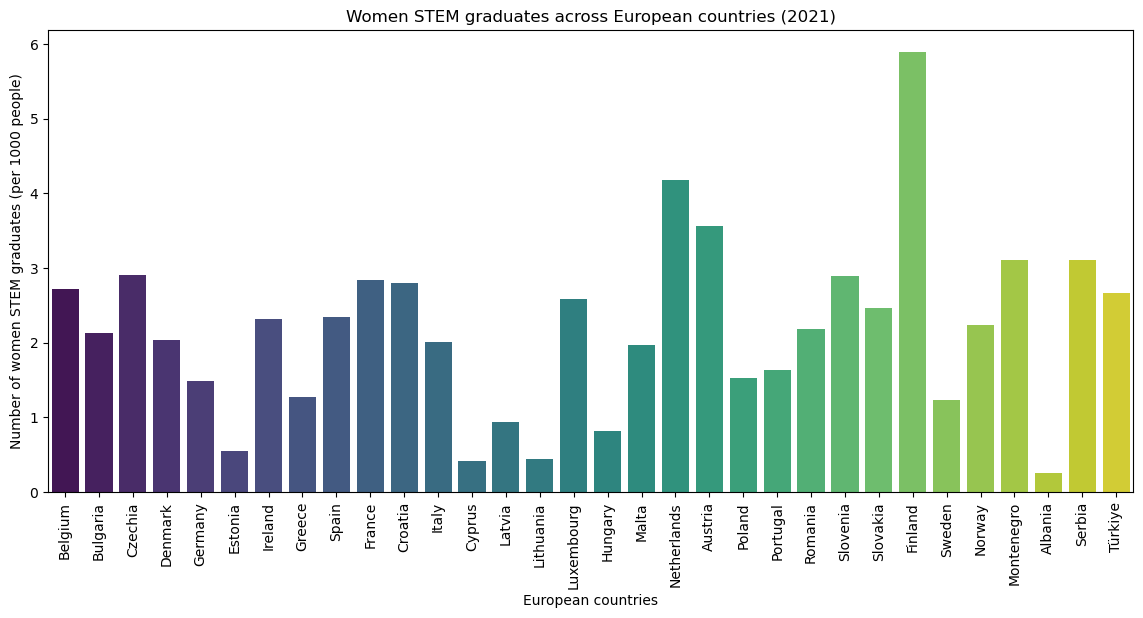

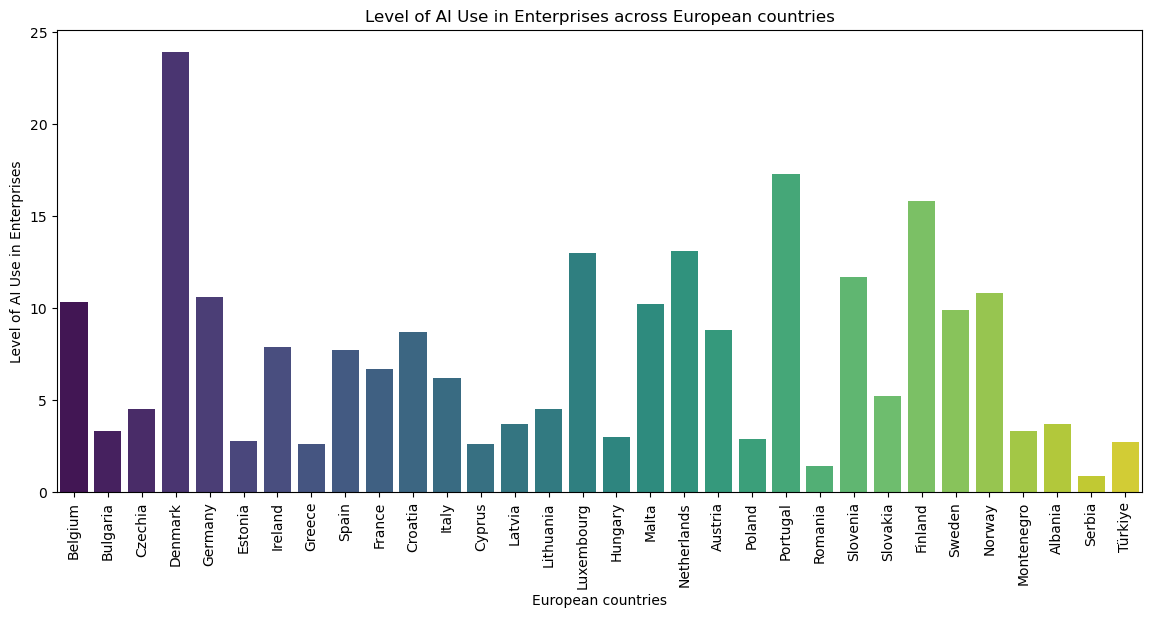

In [47]:
#Creating plots for exploring the data

# Select the column for "no grad 1000"
no_grad_values = df['no grad pr 1000']
country = df['country']
ai_enter_values_column = df['ai_enter']

# Create a histogram from bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=country, y=no_grad_values, data=df, palette='viridis')

# Add labels and title
plt.xlabel('European countries')
plt.ylabel('Number of women STEM graduates (per 1000 people)')
plt.title('Women STEM graduates across European countries (2021)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Showing the plot of women in stem grad
plt.show()

# Create a bar plot for AI enterprise
plt.figure(figsize=(14, 6))
sns.barplot(x=country, y=ai_enter_values_column, data=df, palette='viridis')

# Add labels and title
plt.xlabel('European countries')
plt.ylabel('Level of AI Use in Enterprises')
plt.title('Level of AI Use in Enterprises across European countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [48]:
# Data preprocessing 

# Selecting feature variables
features = df[['ai_enter','internet use','internet access','E-Government','good digital skills','NOP never used internet']]

#picking target variable
target = df['no grad pr 1000']

# Train-test - splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Root Mean Squared Error: 0.5612778566007497
Mean Absolute Error :  0.5106683047299098


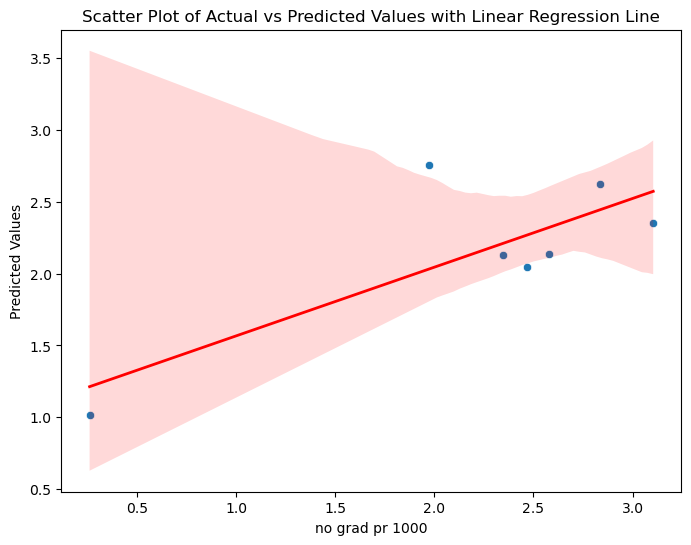

In [49]:
# Creating linear regression model
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_linear_pred = linear_reg_model.predict(X_test)

# Printing the RMSE and MEA 
rmse = np.sqrt(mean_squared_error(y_linear_pred, y_test))
MAE = mean_absolute_error(y_test, y_linear_pred)

print("Root Mean Squared Error: {}".format(rmse))
print('Mean Absolute Error : ', MAE) 

# Plot the scatter plot with the linear regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_linear_pred)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values with Linear Regression Line')

# Add a linear regression line
sns.regplot(x=y_test, y=y_linear_pred, scatter=False, color='red', line_kws={'linewidth': 2})

# Show plot
plt.show()

Mean Squared Error: 1.0096483232464888
R-squared: -0.34311618520490317


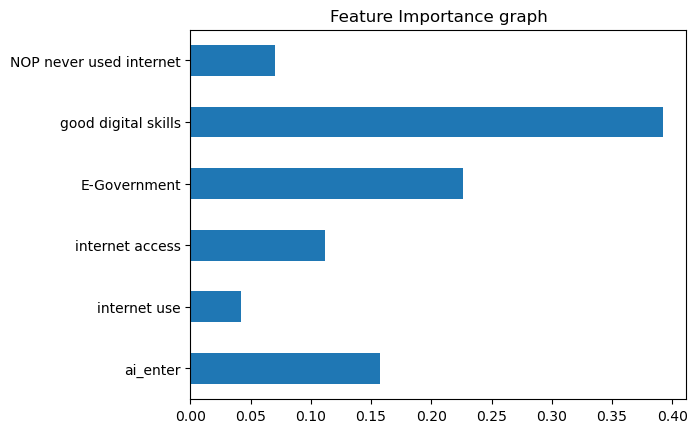

In [50]:
# Extra: 
# Creating Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making the predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance to show importence of each feature for the model
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
feature_importance.plot(kind='barh')
plt.title('Feature Importance graph')

#Show plot
plt.show()